In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import missingno as msno

In [4]:
df=pd.read_csv("/content/drive/My Drive/data.csv")

In [5]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
df.shape

(54808, 14)

In [ ]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [ ]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


# Univariant and Bivariant Analysis

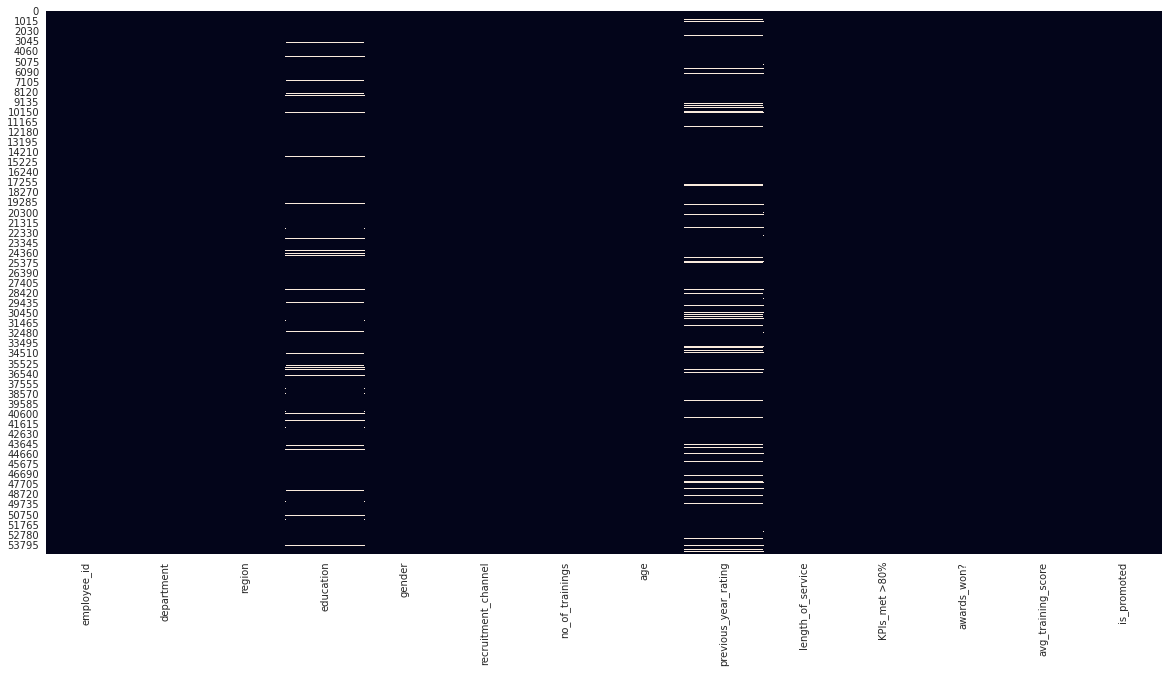

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(df.isnull(), cbar = False)
plt.show()

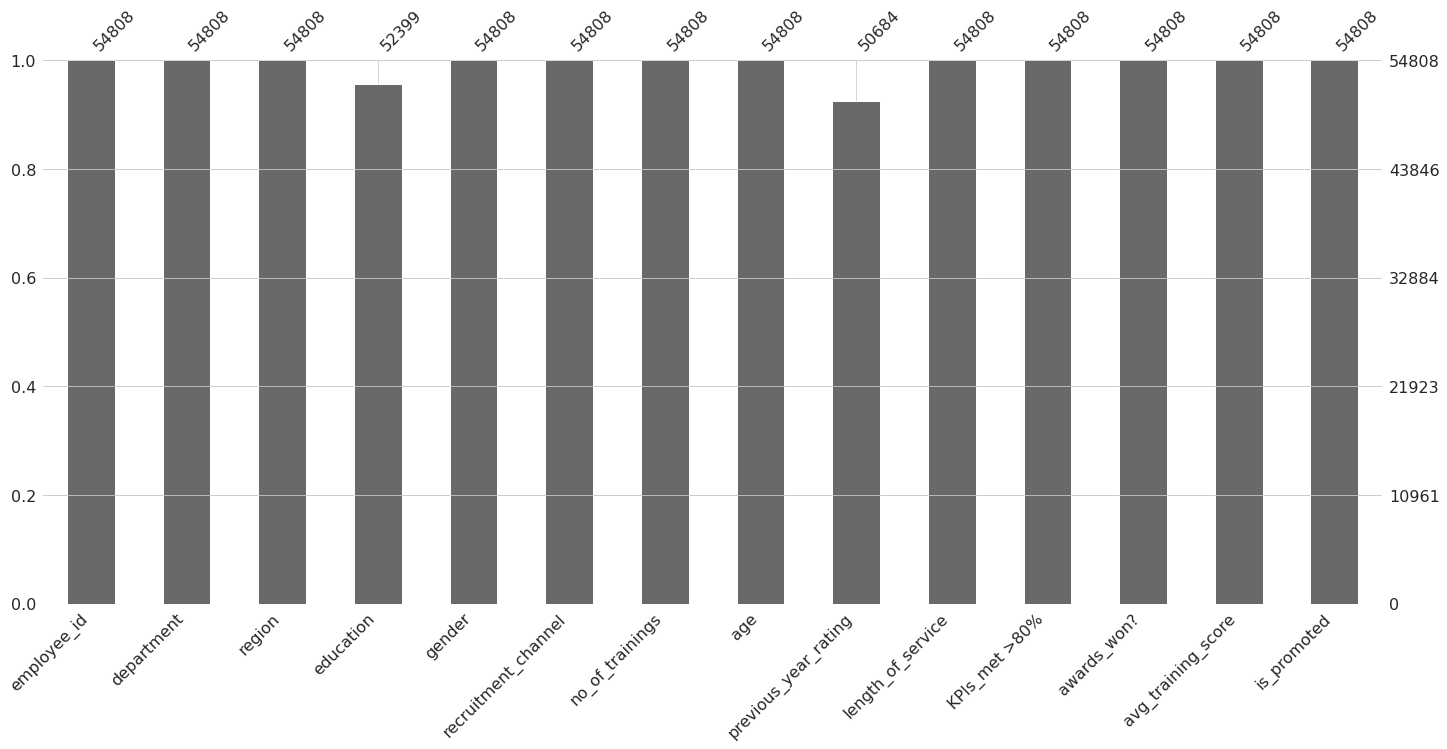

In [ ]:
msno.bar(df)

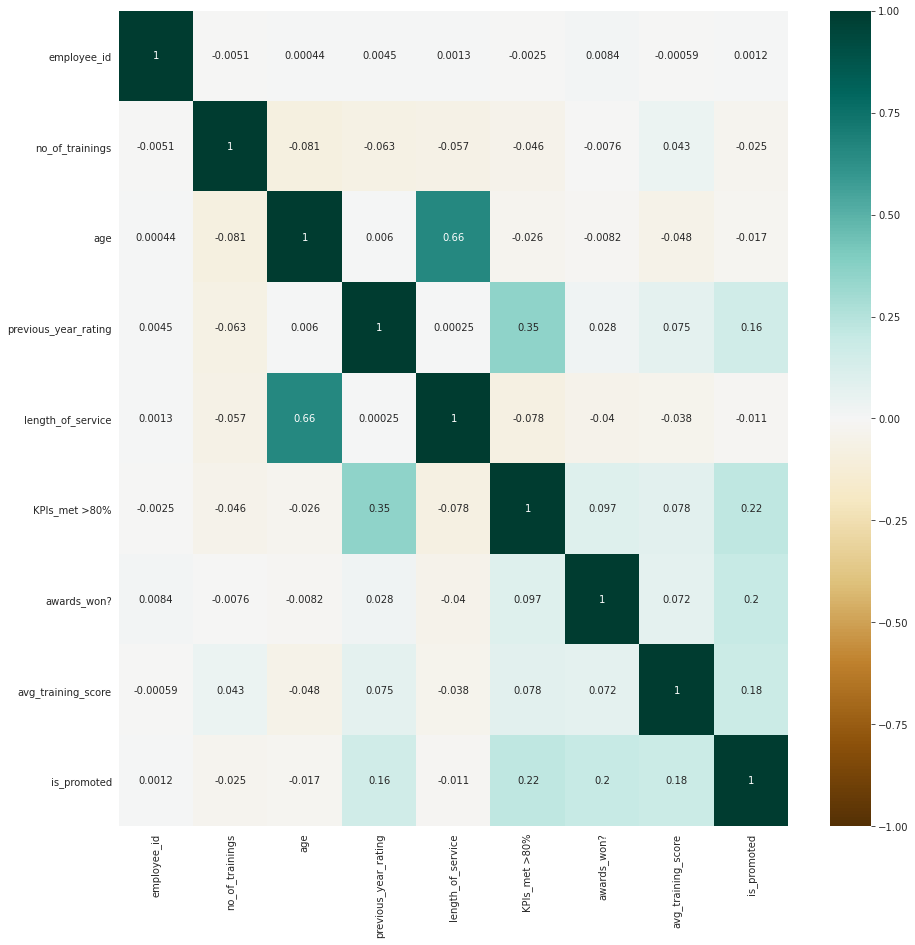

In [ ]:
plt.figure(figsize=(15,15))
c= df.corr()
sns.heatmap(c,cmap="BrBG",vmin=-1,vmax=1,annot=True)
plt.show()

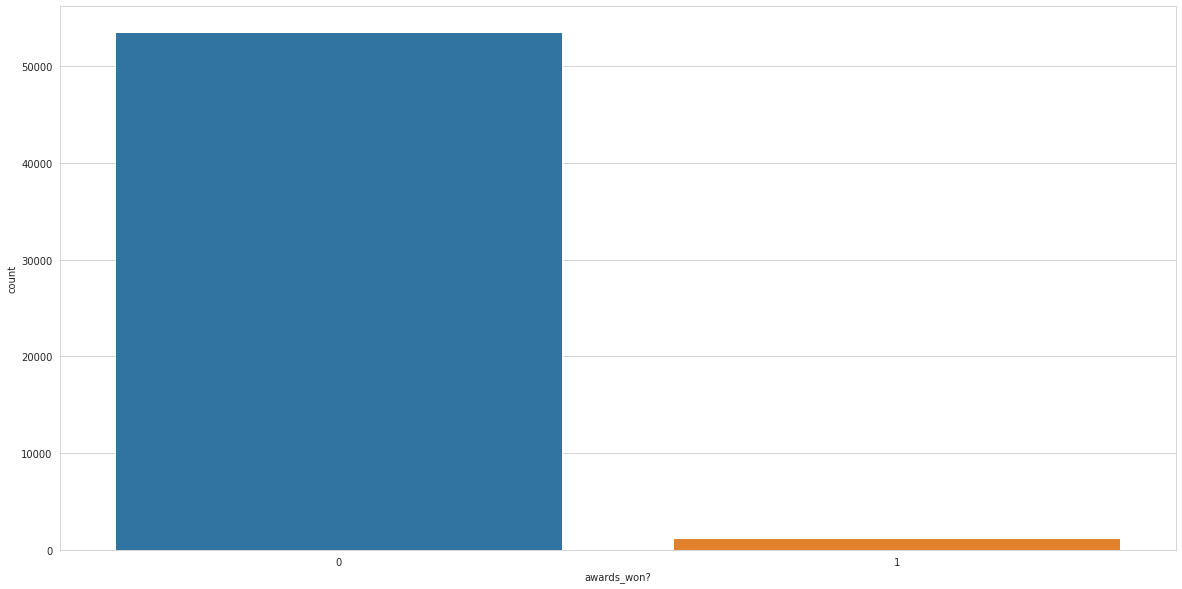

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='awards_won?', data = df) 
# Show the plot 
plt.show() 

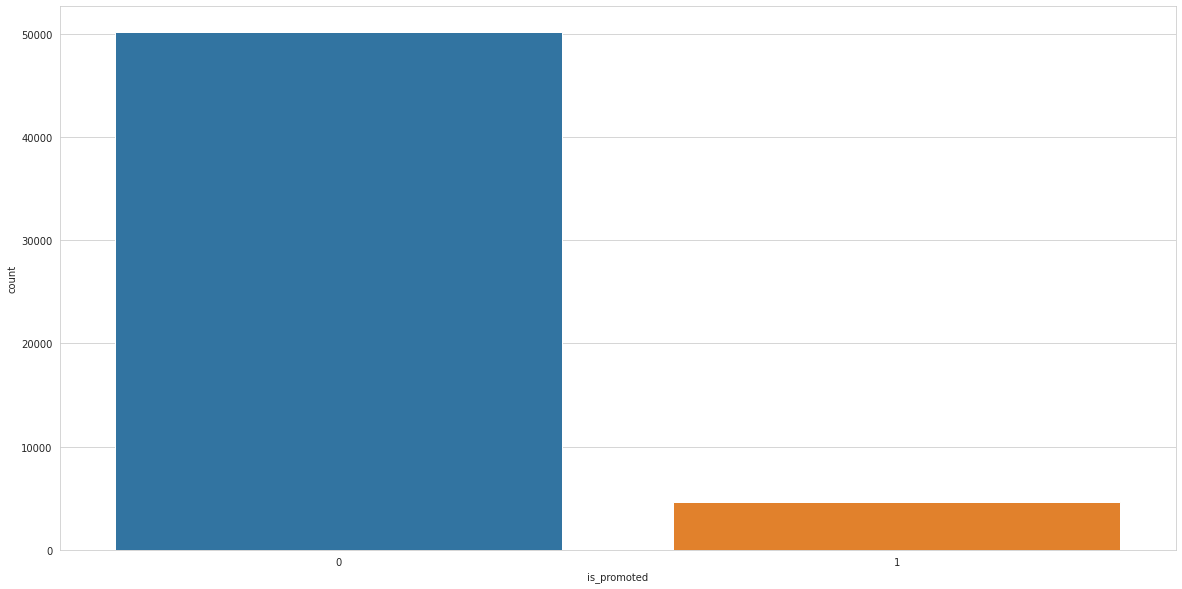

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
# count plot on single categorical variable 
sns.countplot(x ='is_promoted', data = df) 
# Show the plot 
plt.show() 

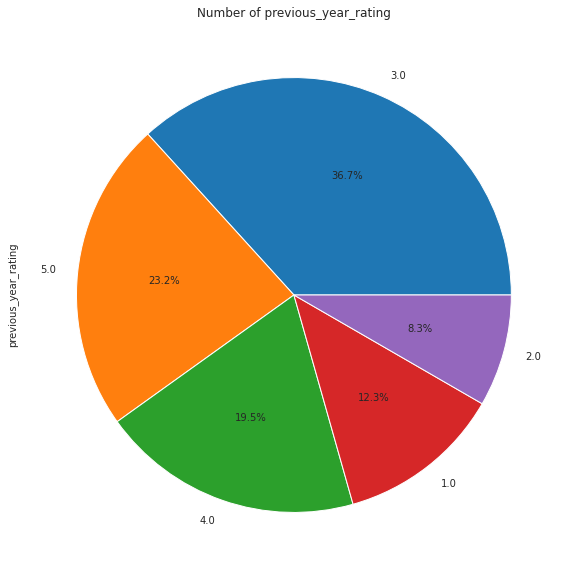

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
df.previous_year_rating.value_counts(sort=True).head(20).plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of previous_year_rating')
plt.show()

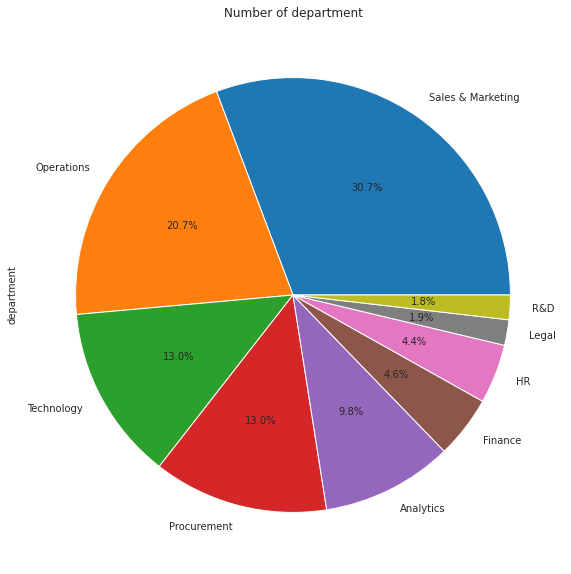

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
df.department.value_counts(sort=True).head(20).plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of department')
plt.show()

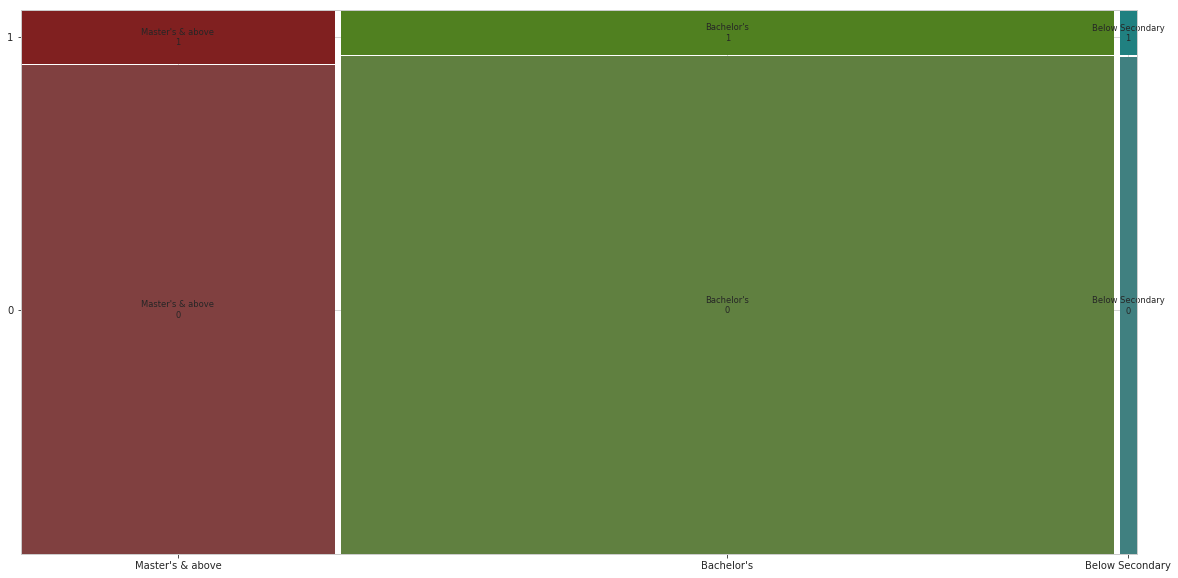

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['education', 'is_promoted'])
plt.show()

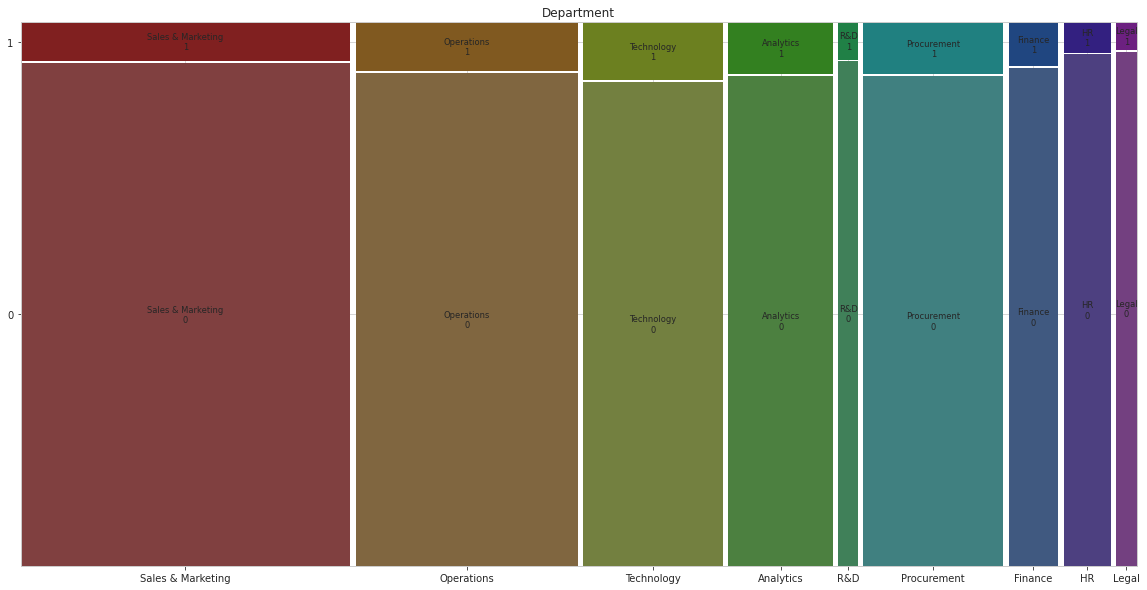

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['department', 'is_promoted'],title='Department')
plt.show()

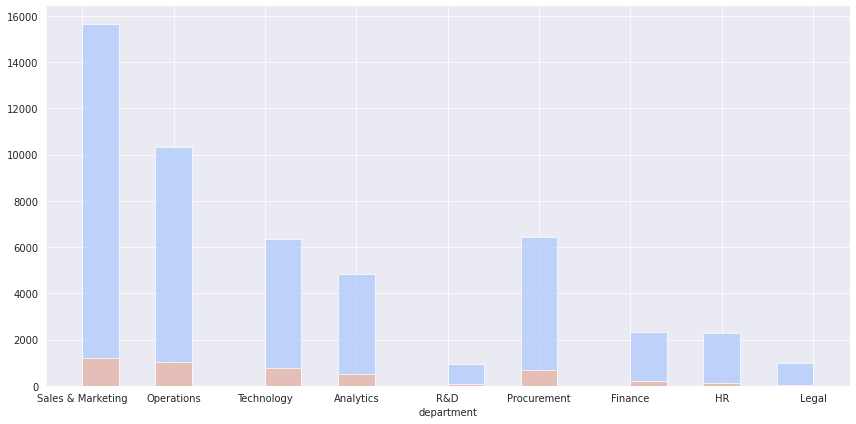

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="is_promoted",palette='coolwarm',height=6,aspect=2,)
g = g.map(plt.hist,'department',bins=20,alpha=0.7)

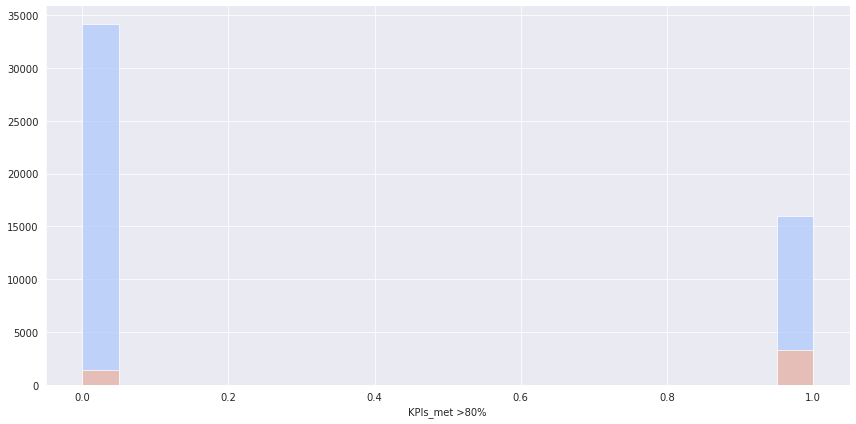

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="is_promoted",palette='coolwarm',height=6,aspect=2,)
g = g.map(plt.hist,'KPIs_met >80%',bins=20,alpha=0.7)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


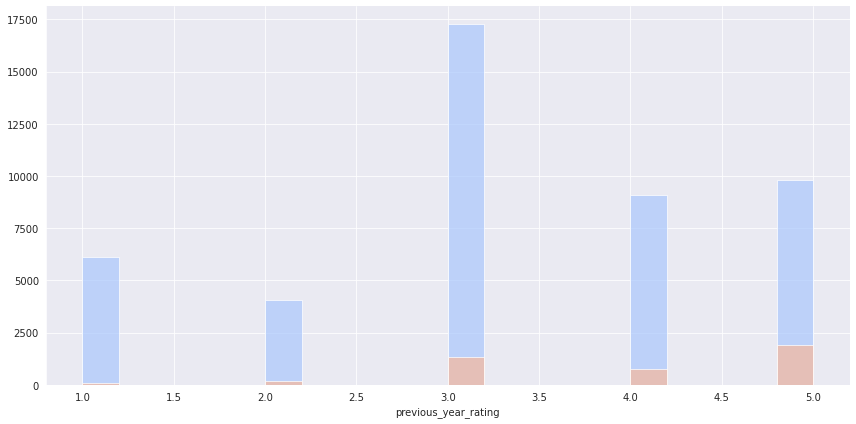

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="is_promoted",palette='coolwarm',height=6,aspect=2,)
g = g.map(plt.hist,'previous_year_rating',bins=20,alpha=0.7)

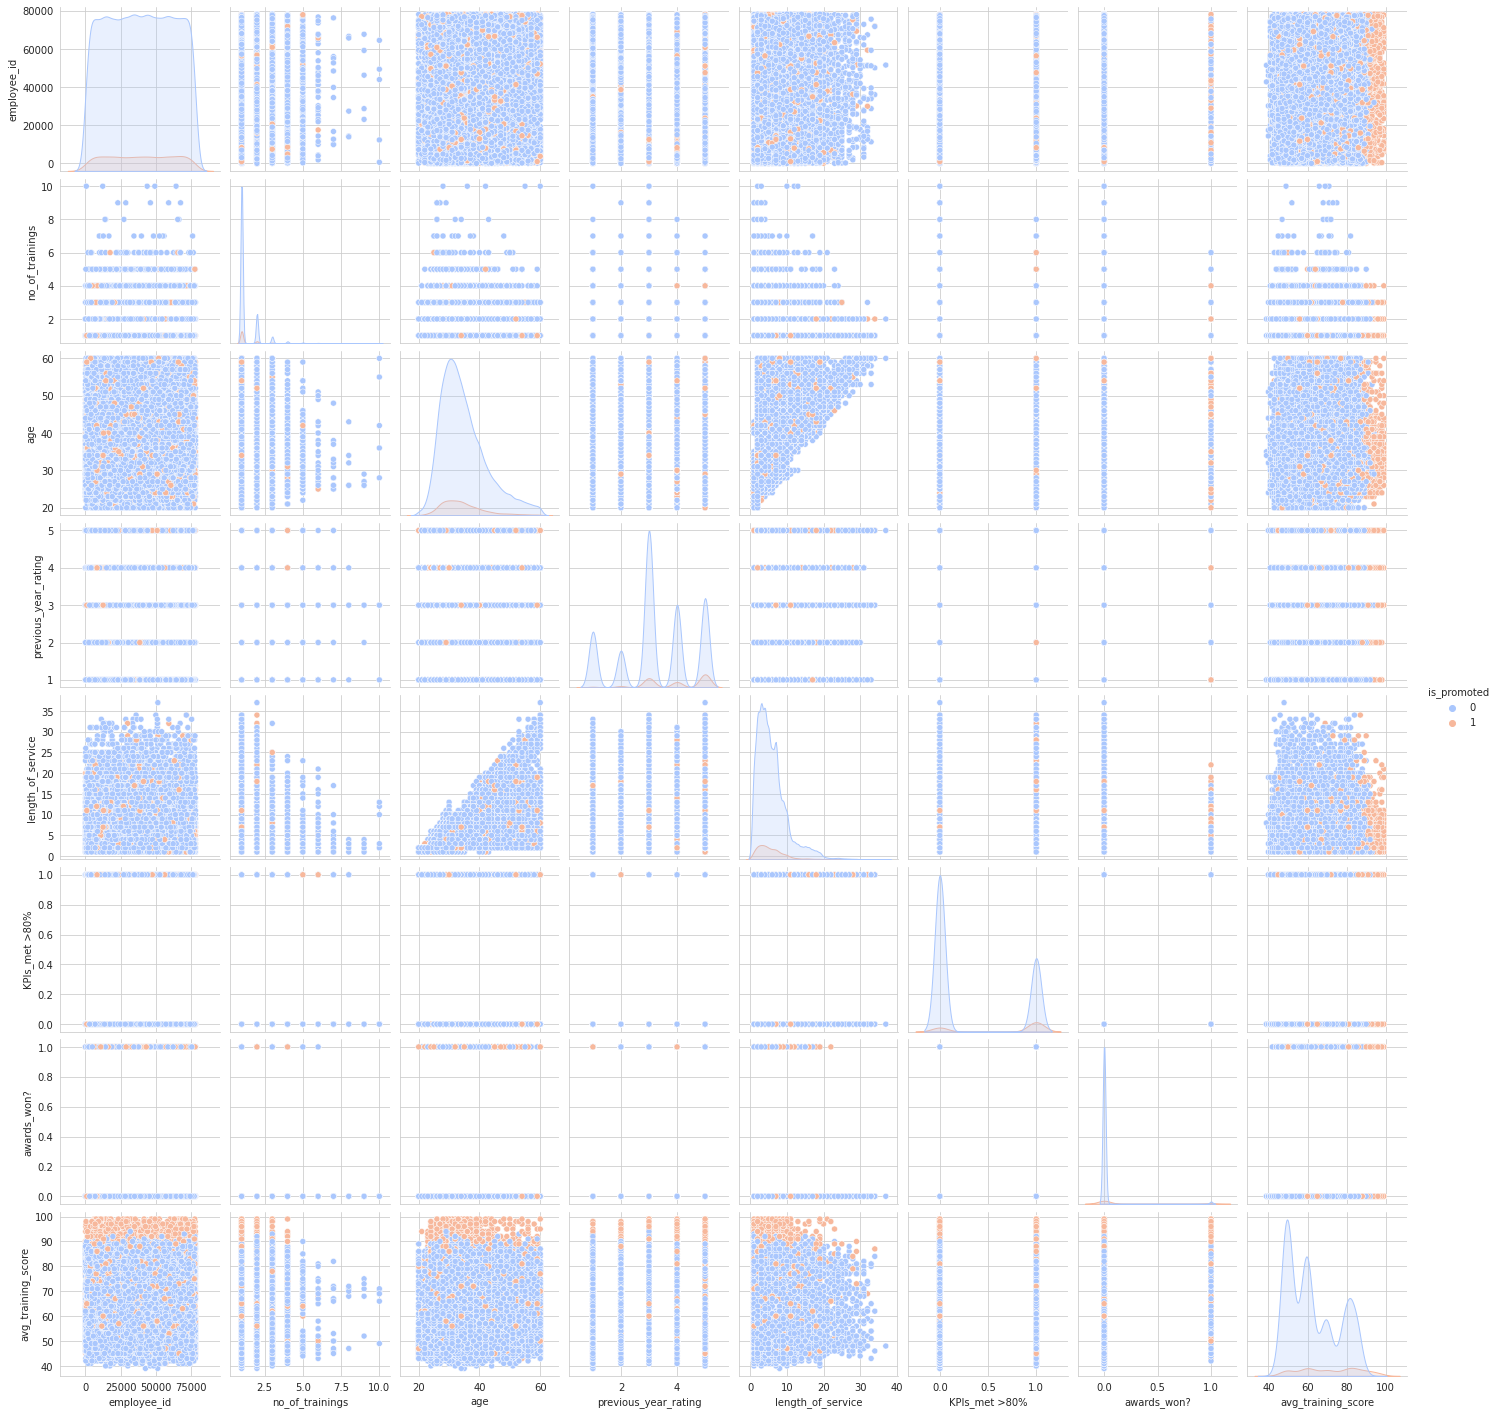

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.set_style('whitegrid')
sns.pairplot(df, hue = "is_promoted",palette='coolwarm' );
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


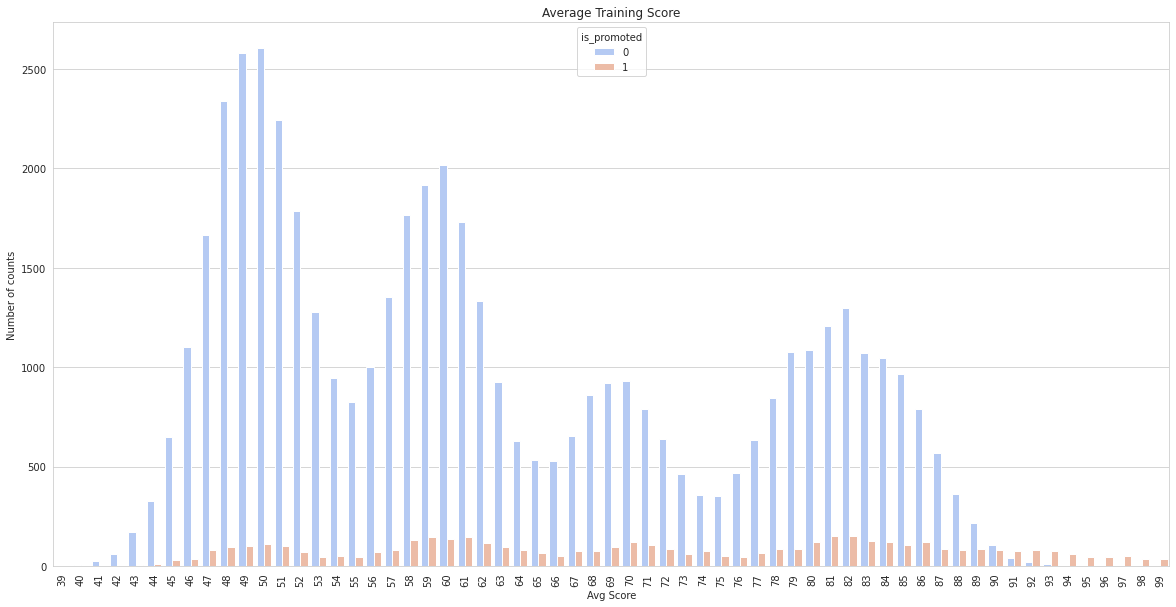

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['avg_training_score'], hue=df['is_promoted'],palette='coolwarm')
plt.title("Average Training Score")
plt.xlabel("Avg Score")
plt.ylabel("Number of counts")
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


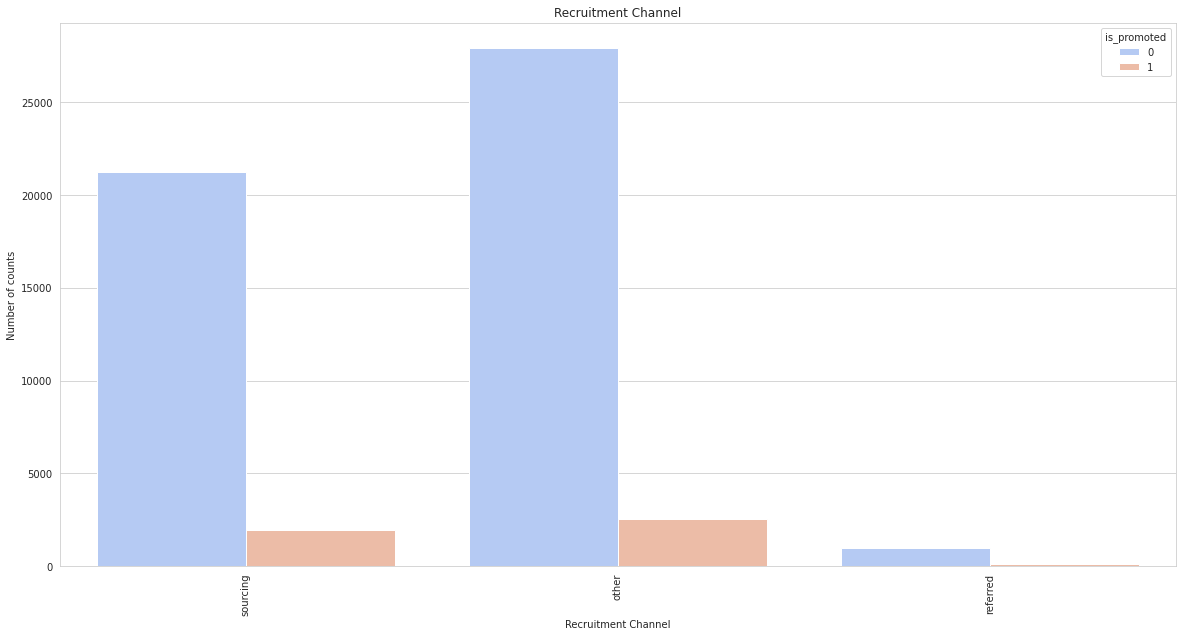

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['recruitment_channel'], hue=df['is_promoted'],palette='coolwarm')
plt.title("Recruitment Channel")
plt.xlabel("Recruitment Channel")
plt.ylabel("Number of counts")
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


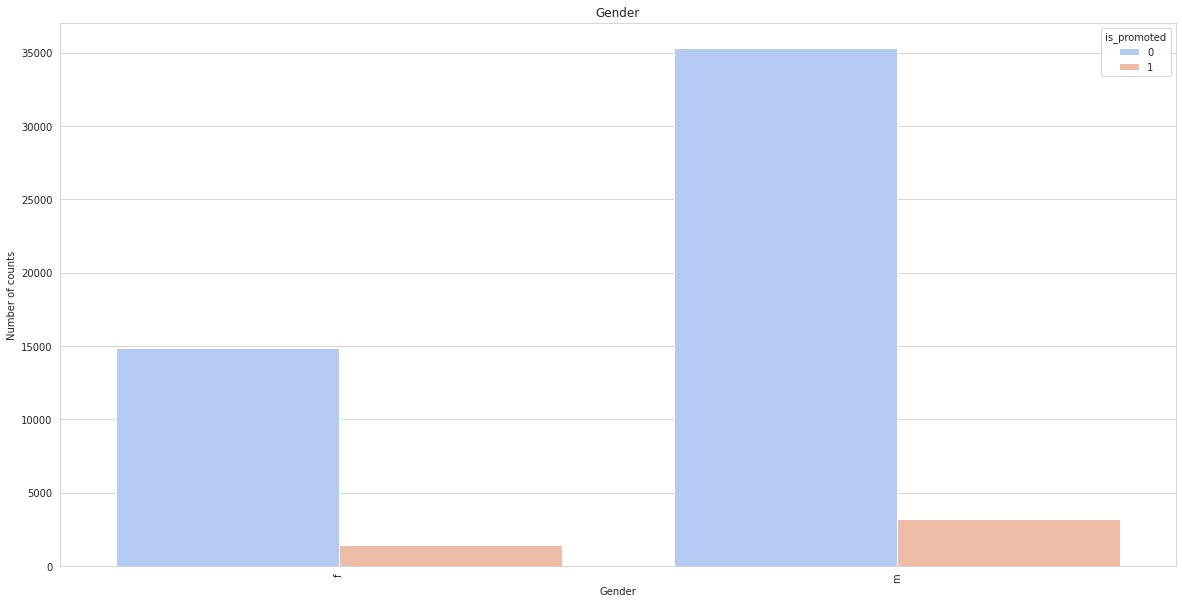

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['gender'], hue=df['is_promoted'],palette='coolwarm')
plt.title("Gender")
plt.xlabel("Gender")
plt.ylabel("Number of counts")
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


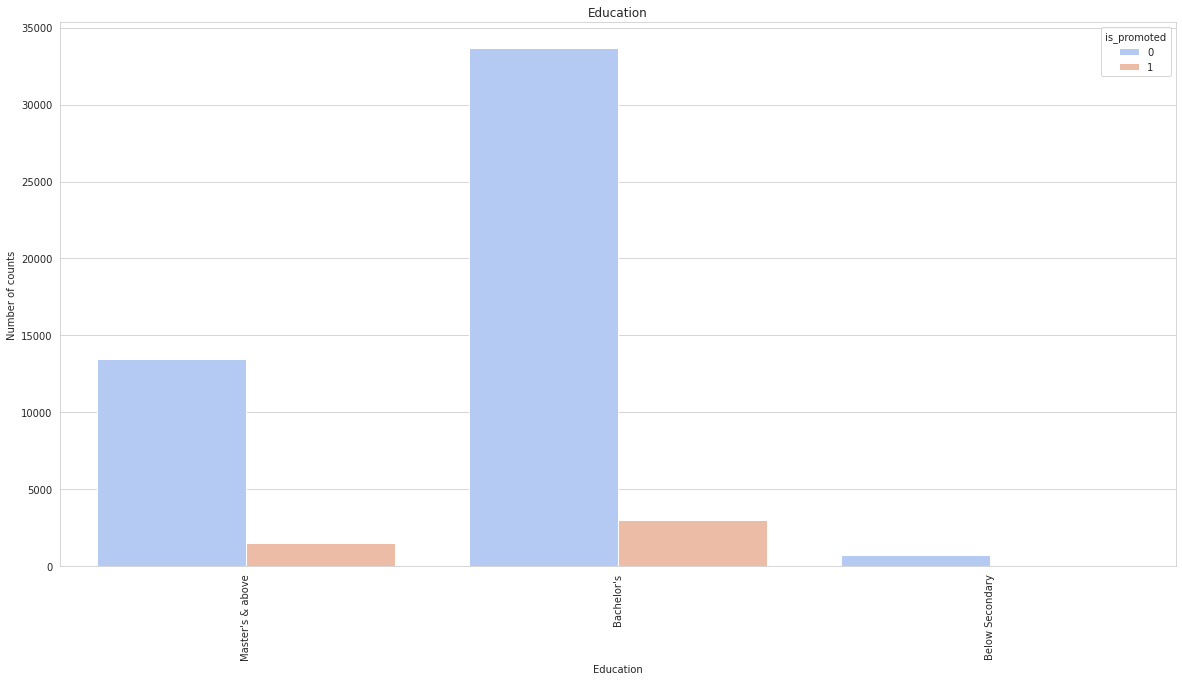

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['education'], hue=df['is_promoted'],palette='coolwarm')
plt.title("Education")
plt.xlabel("Education")
plt.ylabel("Number of counts")
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


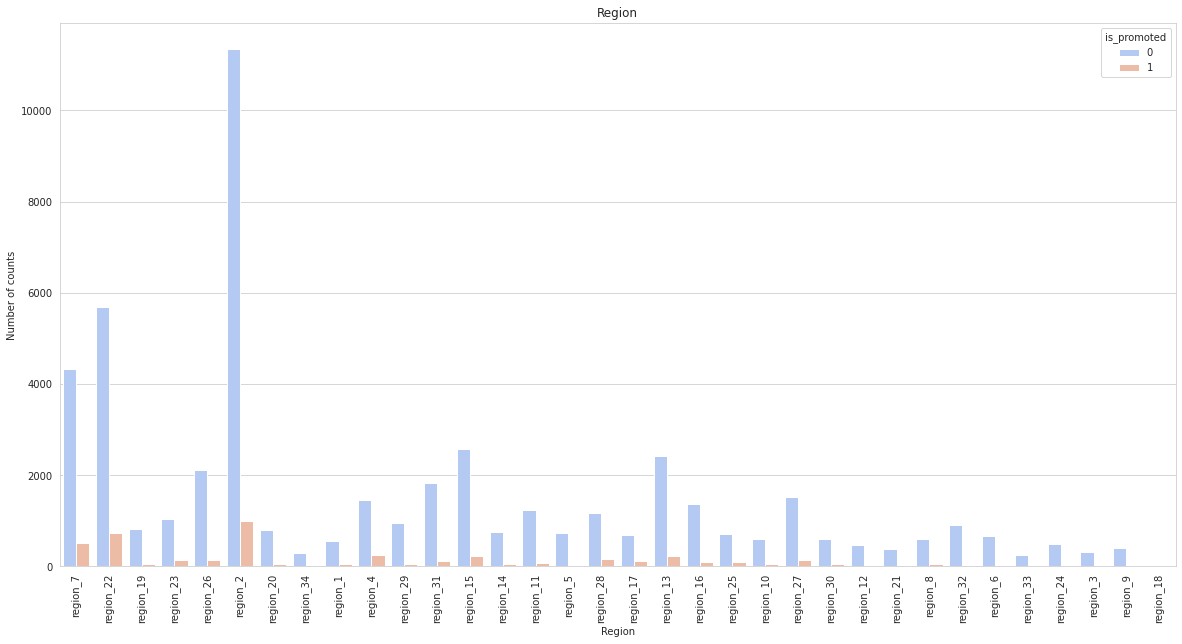

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['region'], hue=df['is_promoted'],palette='coolwarm')
plt.title("Region")
plt.xlabel("Region")
plt.ylabel("Number of counts")
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


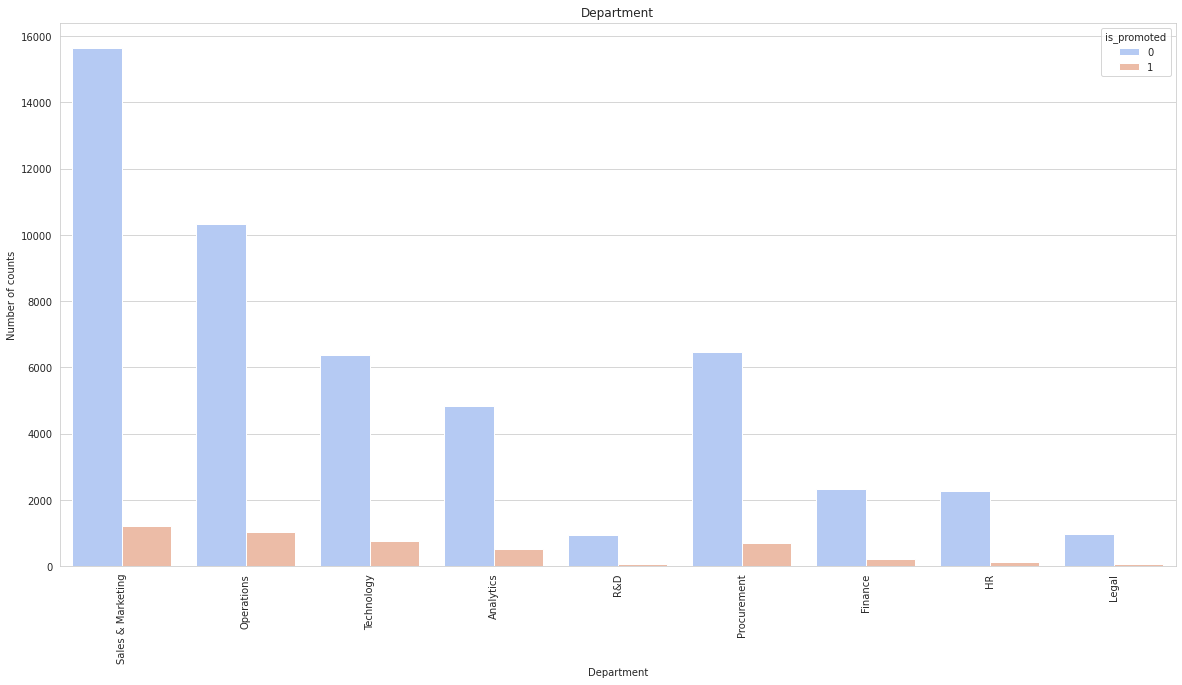

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['department'], hue=df['is_promoted'],palette='coolwarm')
plt.title("Department")
plt.xlabel("Department")
plt.ylabel("Number of counts")
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


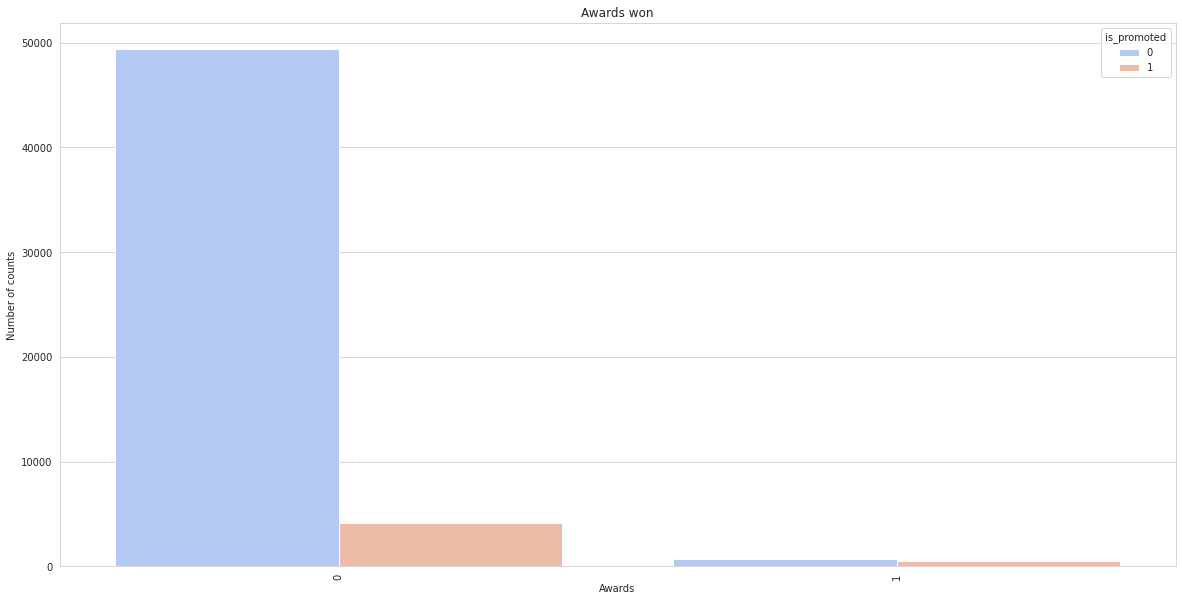

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df['awards_won?'], hue=df['is_promoted'],palette='coolwarm')
plt.title("Awards won")
plt.xlabel("Awards")
plt.ylabel("Number of counts")
plt.xticks(rotation = 90)
plt.show()

# Trivariant Analysis

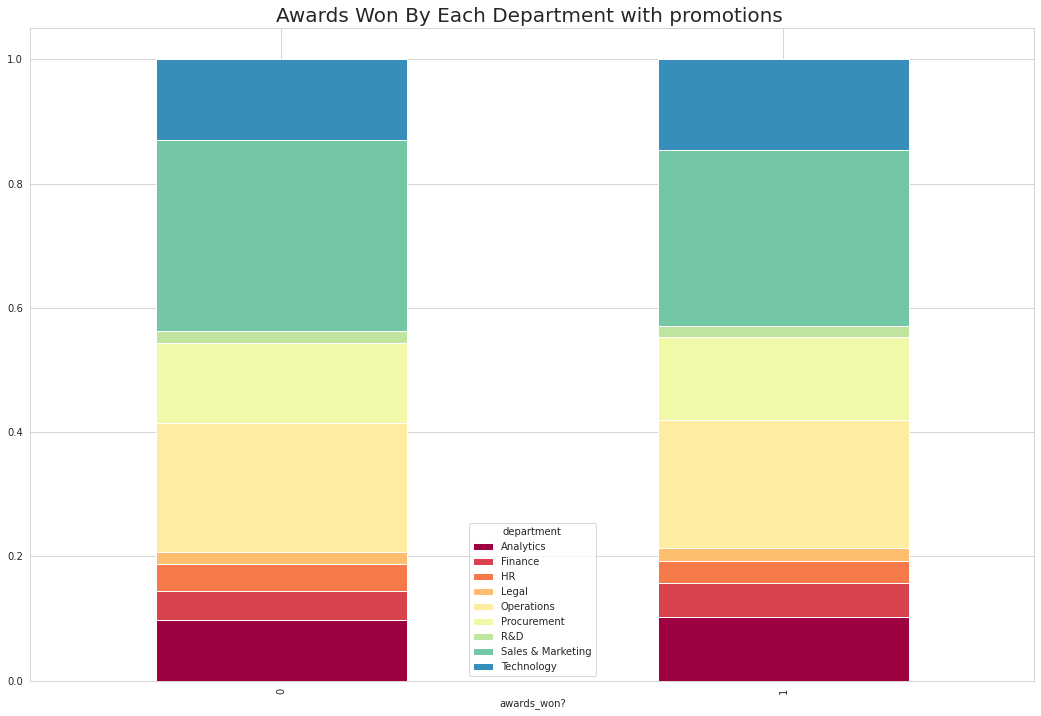

In [ ]:
#district vs category of crime
data = pd.crosstab(df['awards_won?'], df['department'])
color = plt.cm.Spectral(np.linspace(0, 1, 10))

data.div(data.sum(1).astype(float), axis = 0).plot.bar(stacked = True, color = color, figsize = (18, 12))
plt.title('Awards Won By Each Department with promotions ', fontweight = 30, fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


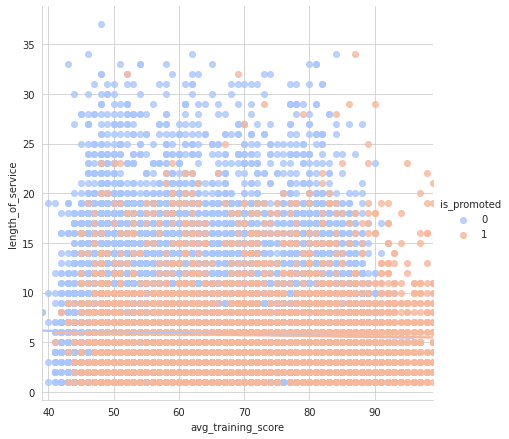

In [ ]:
sns.set_style('whitegrid')
sns.lmplot('avg_training_score','length_of_service',data=df, hue='is_promoted',
           palette='coolwarm',height=6,aspect=1,fit_reg=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


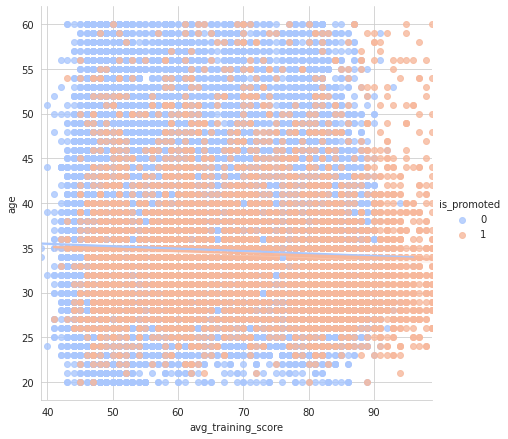

In [ ]:
sns.set_style('whitegrid')
sns.lmplot('avg_training_score','age',data=df, hue='is_promoted',
           palette='coolwarm',height=6,aspect=1,fit_reg=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


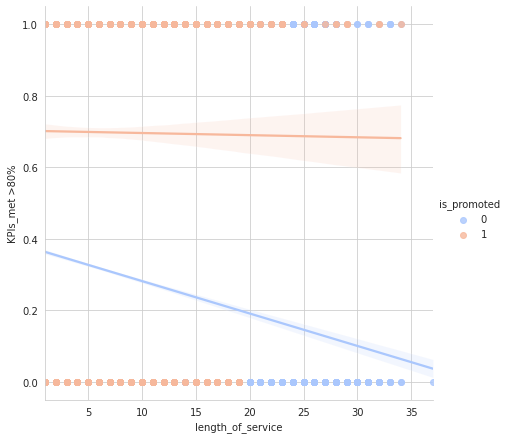

In [ ]:
sns.set_style('whitegrid')
sns.lmplot('length_of_service','KPIs_met >80%',data=df, hue='is_promoted',
           palette='coolwarm',height=6,aspect=1,fit_reg=True)

# Feature Engineering

In [8]:
df1=df

In [10]:
df1 = pd.get_dummies(df1, columns=['department', 'region','education','gender','recruitment_channel'])

In [11]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df1 = pd.DataFrame(imputer.fit_transform(df1),columns = df1.columns)

In [12]:
df1["previous_year_rating"]=df1["previous_year_rating"].astype("int64")

In [13]:
df1.drop("employee_id",axis=1,inplace=True)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)

In [20]:
X=df1.drop("is_promoted",axis=1)
y=df1["is_promoted"]

# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split 
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# For Imbalance of Class using SMOTE technique

In [22]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


Before OverSampling, counts of label '1': 3282
Before OverSampling, counts of label '0': 35083 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (70166, 58)
After OverSampling, the shape of train_y: (70166,) 

After OverSampling, counts of label '1': 35083
After OverSampling, counts of label '0': 35083


# Logistics Regression

In [23]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report 
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87     15057
         1.0       0.25      0.80      0.38      1386

    accuracy                           0.78     16443
   macro avg       0.61      0.79      0.63     16443
weighted avg       0.92      0.78      0.83     16443



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Random Forest

In [24]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [27]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[14984    73]
 [ 1005   381]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     15057
         1.0       0.84      0.27      0.41      1386

    accuracy                           0.93     16443
   macro avg       0.89      0.64      0.69     16443
weighted avg       0.93      0.93      0.92     16443



=== All AUC Scores ===
[0.89018906 0.87171615 0.87514382 0.88524829 0.86838693 0.87741156
 0.88731103 0.89014507 0.88866795 0.87732867]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8811548523697477


# Random Forest Tunning

In [28]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.2min finished


{'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': 420}


In [30]:
rfc = RandomForestClassifier(n_estimators=600, max_depth=420, max_features='sqrt')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[14990    67]
 [ 1002   384]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     15057
         1.0       0.85      0.28      0.42      1386

    accuracy                           0.93     16443
   macro avg       0.89      0.64      0.69     16443
weighted avg       0.93      0.93      0.92     16443



=== All AUC Scores ===
[0.89546806 0.87765541 0.883278   0.88873446 0.87585809 0.88391668
 0.89057    0.89702238 0.89146741 0.88239239]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8866362891845962


# Simple ANN

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [32]:
X=X
Y=y

In [33]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [34]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, input_dim=32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [35]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=10, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 94.05% (0.21%)


All Insights and Explaination is Given In the Document.